- na straně 135
- občas klasifikuje špatně, jednu třidu rozdělí na 2 a 2 naopak spojí

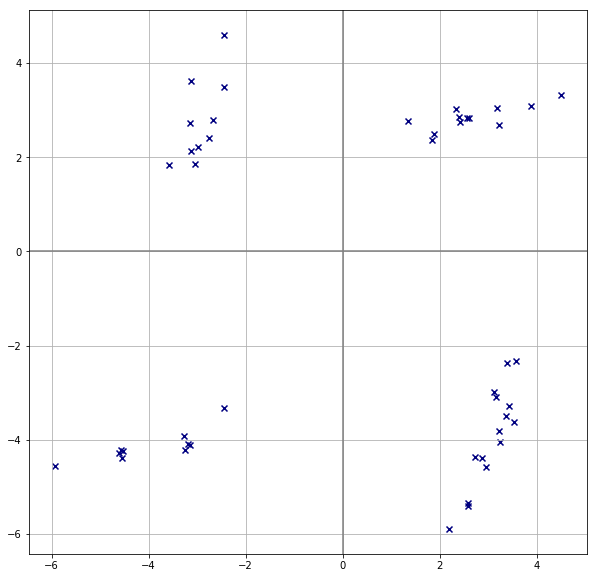

In [57]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

data = np.genfromtxt('data4.txt', delimiter=' ')
data_len = len(data)

plt.scatter(data[:,0],data[:,1], color='navy', marker='x')
plt.grid(True, which='both')
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')

[1127.6045895956704, 372.642395098726, 278.9776316483636, 278.9776316483636]


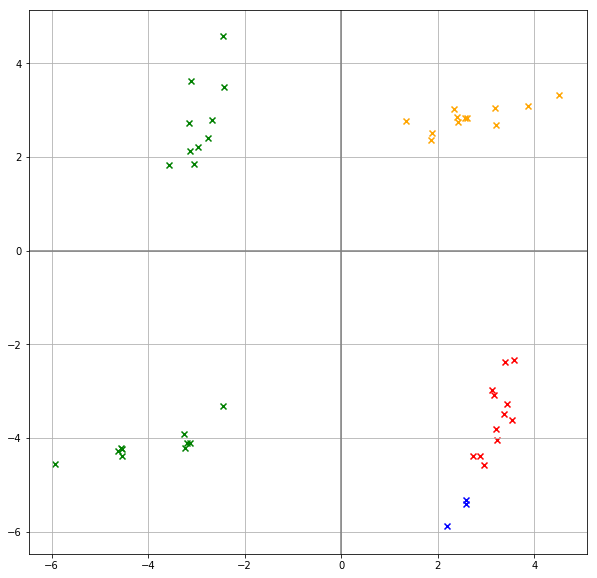

In [61]:
from tools import dist_v

# počet tříd, do kterých klasifikuji
cl_nb = 4

# ukazatel kvality (na jeho základě rozhoduji o zastavení iterací)
J = []
eps = 1.e-03

#matice vzdáleností v rámci tříd (třídy=sloupce)
dist_cl = np.full((len(data),cl_nb),np.inf)

mi = data[np.random.choice(data_len, 4, replace=False)]    

for j in range(0,16):
    #výpočet metrik v rámci tříd
    for i in range(0,cl_nb):
        dist_cl[:,i]=dist_v(data,mi[i])

    #klasifikace dat do tříd (vektor velikosti data s hodnotou = index třídy)
    data_cl = np.argmin(dist_cl,axis=1)

    # výpočet nových centroidů
    mi = []
    J_temp = 0
    for i in range(0,cl_nb):
        J_temp += np.sum(dist_cl[np.where(data_cl==i),i])
        mi.append(np.average(data[np.where(data_cl==i),:],axis=1))
    J.append(J_temp)
    if len(J) > 1 and np.abs(J[j]-J[j-1]) < eps:
            break

print(J)

# vrátit roztříděná data v nějaké formě - možná bude stačit ten vektor s roztříděním

#vykreslit data do tříd s různějma barvama
plt_col = ['red','green','blue','orange']
for i in range(0,cl_nb):
    plt.scatter(data[np.where(data_cl==i),0],data[np.where(data_cl==i),1], color=plt_col[i], marker='x')
plt.grid(True, which='both')
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')
plt.show()

In [63]:
#### !!!!!! nedaří se mi iterativní optimalizaci použít. Mě to z ní vypadává optimální ke zvoleným středům
#### !!! pokud si napískám náhodně jiné středy, tak by se to přesouvat chtělo. Ale to bych dělat neměl


from tools import metric
#provedu iterativní optimalizaci:
    # vstupy: třídy dat Ti, jejich centroidy mii, četnosti si a hodnota kriteriální funkce J
    # procházet všechny prvky všech tříd (postupně) a pokoušet se je přeřadit do tříd ostatních
    # kritérium je poměrně jednoduché porovnávám pokles a nárůst 
    # pokud vyhoví kritériu, tak přesunu a jedu dál

print(mi)
print("---")
T = []    
s = []
#mi = data[np.random.choice(data_len, 4, replace=False)]  

for i in range(cl_nb):
    T.append(data[np.where(data_cl==i),:])
    s.append(len(T[i][0]))
    #mi.append(np.average(T[i][0],axis=0))
#print(s)
#print(J[-1:])
#print(mi)
#print("---")
#print(s[i]/(s[i]-1))

for i in range(cl_nb):
#i = 2
    #for j in range(s[i]):
 #   Ai_v = s[i]/(s[i]-1)*dist_v(T[i][0],mi[i])
 #   Aj_v = []
 #   for j in range(cl_nb):
  #      Aj_vs.append(s[j]/(s[j]+1)*dist_v(T[i][0],mi[j]))

    
    #s se esmí rovna 1 (jen jeden prvek ve třídě) - jinak bych dělil 0
    

# pole vzdáleností prvků i-té třídy od středů všech tříd

    Aj_vs = np.full((s[i],cl_nb),np.inf)
    for j in range(0,cl_nb):
        if i==j:
            coef = s[j]/(s[j]-1)
        else:
            coef = s[j]/(s[j]+1)
        #print(coef)
        Aj_vs[:,j]=coef * dist_v(T[i][0],mi[j])
        #print(dist_v(T[i][0],mi[j]))
        #print(Aj_vs[:,j])

    print(Aj_vs)    
    #maska kam přesunout jaké body
    move_mask = np.argmin(Aj_vs,axis=1)


    print(move_mask)
    #for k
    

[[ 3.182162  3.053727]
 [-3.578107  1.830114]
 [ 3.535814 -3.620164]
 [ 2.337798  3.016283]]
---
[[27.06268215 24.86080364 44.54895254 43.01813289]
 [42.11310213 38.32925409 55.0671364  42.78018625]
 [46.75250501 42.50539428 55.73977863 39.037741  ]
 [43.52557167 39.626654   53.54728073 38.79468526]
 [50.34577326 45.75638013 54.16093275 33.2772618 ]
 [37.45165111 34.17197414 51.40117185 41.85846435]
 [27.27289987 25.02432293 46.10326681 45.47356406]
 [34.32834506 31.40749805 47.323868   38.70122577]
 [53.77250156 48.79101046 58.07540891 36.09152926]
 [39.96641336 36.42918082 52.48560434 40.84228324]
 [32.854262   30.09023693 46.16159197 38.51093833]
 [50.74620101 46.10082559 55.56405912 35.00388439]]
[1 1 3 3 3 1 1 1 3 1 1 3]
[[7.80350179e+01 9.12823947e+01 2.93975002e+01 1.65517597e+00]
 [7.94558367e+01 9.29254240e+01 3.01380319e+01 1.81791816e+00]
 [1.81675350e+01 2.06093583e+01 2.26622052e+00 5.12112956e+01]
 [2.31765516e+01 2.65836180e+01 5.62898349e-01 4.06876854e+01]
 [2.42883319

In [28]:
a = range(0,4)-1
print(a)

TypeError: unsupported operand type(s) for -: 'range' and 'int'